# 理论证明：两层ReLU网络的通用逼近性

根据通用逼近定理（Universal Approximation Theorem），一个包含足够多隐藏神经元的两层神经网络，在激活函数为ReLU时，可以以任意精度逼近任何连续函数。具体分析如下：

### 数学表达
给定任意连续函数 $ f: \mathbb{R}^n \to \mathbb{R}^m $ 和紧凑集 $ K \subset \mathbb{R}^n $，存在一个两层神经网络 $ \hat{f} $ 满足：

$$ \sup_{x \in K} \| f(x) - \hat{f}(x) \| < \epsilon $$

其中隐藏层使用ReLU激活，输出层为线性组合。

### 直观解释
- **ReLU的分段线性特性**：每个ReLU神经元可定义输入空间的一个"折点"，通过多个折点的叠加可构造复杂函数。
- **隐藏层的组合能力**：第一层通过ReLU划分输入空间，第二层通过线性加权组合这些分段区域。

### 实验验证
以下通过4个函数（线性、二次、正弦、分段线性）的拟合实验验证该理论。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """初始化网络参数"""
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def relu(x):
    """ReLU激活函数"""
    return np.maximum(0, x)

def forward_pass(x, parameters):
    """前向传播"""
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    hidden = relu(np.dot(x, W1) + b1)  # 隐藏层激活值
    y_pred = np.dot(hidden, W2) + b2    # 输出层预测值
    return hidden, y_pred

def backward_pass(x, y_true, y_pred, hidden, parameters):
    """反向传播计算梯度"""
    m = x.shape[0]  # 样本数量
    
    # 输出层梯度
    grad_y_pred = 2 * (y_pred - y_true) / m
    grad_W2 = np.dot(hidden.T, grad_y_pred)
    grad_b2 = np.sum(grad_y_pred, axis=0, keepdims=True)
    
    # 隐藏层梯度 (ReLU导数处理)
    grad_hidden = np.dot(grad_y_pred, parameters["W2"].T)
    grad_hidden[hidden <= 0] = 0  # ReLU梯度掩码
    
    # 输入层梯度
    grad_W1 = np.dot(x.T, grad_hidden)
    grad_b1 = np.sum(grad_hidden, axis=0, keepdims=True)
    
    return {"W1": grad_W1, "b1": grad_b1, "W2": grad_W2, "b2": grad_b2}

def train_model(x, y_true, parameters, learning_rate=0.01, epochs=1000):
    losses = []
    for epoch in range(epochs):
        # 前向传播
        y_hidden, y_pred = forward_pass(x, parameters)
        
        # 计算损失
        loss = np.mean((y_pred - y_true) ** 2)
        losses.append(loss)
        
        # 每100轮输出一次loss
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}: Loss = {loss:.6f}")
            
        # 反向传播
        grads = backward_pass(x, y_true, y_pred, y_hidden, parameters)
        
        # 更新参数
        parameters["W1"] -= learning_rate * grads["W1"]
        parameters["b1"] -= learning_rate * grads["b1"]
        parameters["W2"] -= learning_rate * grads["W2"]
        parameters["b2"] -= learning_rate * grads["b2"]
    
    return parameters, losses

## 实验1：拟合线性函数 $ f(x) = 2x + 3 $

### 理论设计
- **目标**：验证ReLU网络精确表示线性函数的能力
- **网络结构**：2个ReLU神经元足以精确表示，因为：

 $$ \text{ReLU}(x) - \text{ReLU}(-x) = x $$

  通过权重组合可直接得到线性项和偏置项。


训练 500 轮次:
Epoch 100: Loss = 6.244908
Epoch 200: Loss = 3.060092
Epoch 300: Loss = 1.550091
Epoch 400: Loss = 0.881957
Epoch 500: Loss = 0.546095

训练 1000 轮次:
Epoch 100: Loss = 6.684828
Epoch 200: Loss = 3.309115
Epoch 300: Loss = 1.651511
Epoch 400: Loss = 0.929790
Epoch 500: Loss = 0.571310
Epoch 600: Loss = 0.374879
Epoch 700: Loss = 0.258736
Epoch 800: Loss = 0.185860
Epoch 900: Loss = 0.137890
Epoch 1000: Loss = 0.105062

训练 2000 轮次:
Epoch 100: Loss = 0.036229
Epoch 200: Loss = 0.017326
Epoch 300: Loss = 0.007784
Epoch 400: Loss = 0.003326
Epoch 500: Loss = 0.001371
Epoch 600: Loss = 0.000564
Epoch 700: Loss = 0.000219
Epoch 800: Loss = 0.000084
Epoch 900: Loss = 0.000033
Epoch 1000: Loss = 0.000012
Epoch 1100: Loss = 0.000005
Epoch 1200: Loss = 0.000002
Epoch 1300: Loss = 0.000001
Epoch 1400: Loss = 0.000000
Epoch 1500: Loss = 0.000000
Epoch 1600: Loss = 0.000000
Epoch 1700: Loss = 0.000000
Epoch 1800: Loss = 0.000000
Epoch 1900: Loss = 0.000000
Epoch 2000: Loss = 0.000000


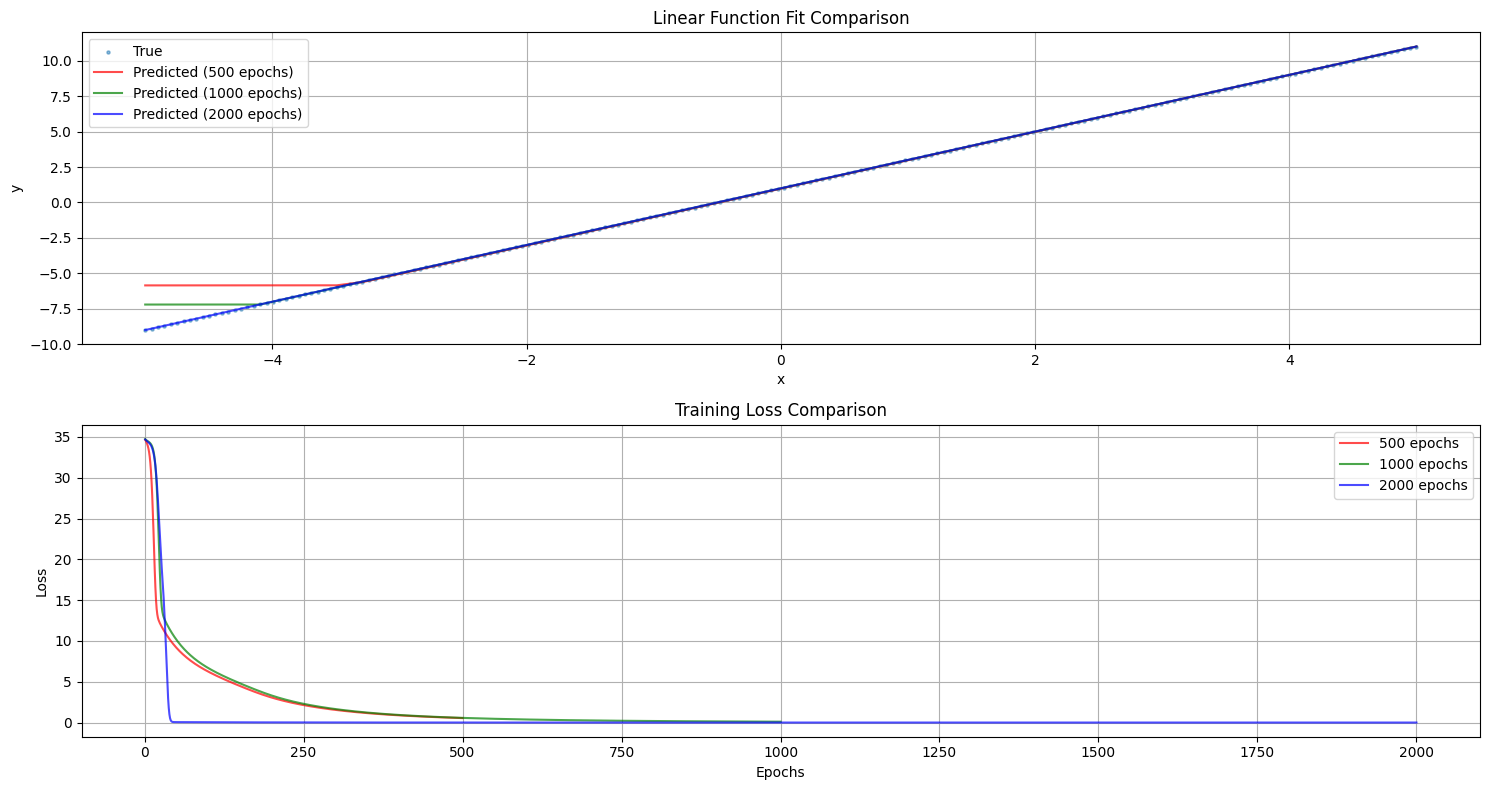

In [3]:
# 实验1：拟合线性函数
# 生成数据
x = np.linspace(-5, 5, 200)
y_true = 2 * x + 1  # f(x) = 2x + 1
x = x.reshape(-1, 1)
y_true = y_true.reshape(-1, 1)

# 定义不同的训练轮次
epochs_list = [500, 1000, 2000]
all_parameters = []
all_losses = []

# 训练不同轮次的模型
for epochs in epochs_list:
    # 初始化参数
    parameters = initialize_parameters(
        input_size=1, 
        hidden_size=2,  # 使用2个神经元即可拟合
        output_size=1
    )
    
    print(f"\n训练 {epochs} 轮次:")
    parameters_trained, losses = train_model(
        x, y_true, parameters,
        learning_rate=0.01,
        epochs=epochs
    )
    
    all_parameters.append(parameters_trained)
    all_losses.append(losses)

# 可视化不同轮次的结果
plt.figure(figsize=(15,8))

# 绘制拟合结果对比
plt.subplot(2,1,1)
plt.scatter(x, y_true, s=5, label='True', alpha=0.5)
colors = ['r', 'g', 'b']
for i, (epochs, params) in enumerate(zip(epochs_list, all_parameters)):
    _, y_pred = forward_pass(x, params)
    plt.plot(x, y_pred, color=colors[i], label=f'Predicted ({epochs} epochs)', alpha=0.7)
plt.title("Linear Function Fit Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# 绘制loss曲线对比
plt.subplot(2,1,2)
for i, (epochs, losses) in enumerate(zip(epochs_list, all_losses)):
    plt.plot(range(1, len(losses)+1), losses, color=colors[i], label=f'{epochs} epochs', alpha=0.7)
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 实验2：拟合二次函数 $ f(x) = x^2 $

### 理论设计
- **目标**：验证分段线性逼近非线性函数的能力
- **网络结构**：使用20个ReLU神经元，每个神经元对应一个分段线性区域，通过叠加逼近抛物线。
- **关键点**：需要足够多的分段区域（神经元）来减小逼近误差。


训练 1000 轮次:
Epoch 100: Loss = 1.097136
Epoch 200: Loss = 0.711874
Epoch 300: Loss = 0.400730
Epoch 400: Loss = 0.213392
Epoch 500: Loss = 0.121056
Epoch 600: Loss = 0.079629
Epoch 700: Loss = 0.061006
Epoch 800: Loss = 0.051694
Epoch 900: Loss = 0.046063
Epoch 1000: Loss = 0.041955

训练 3000 轮次:
Epoch 100: Loss = 1.052715
Epoch 200: Loss = 0.663767
Epoch 300: Loss = 0.367992
Epoch 400: Loss = 0.196562
Epoch 500: Loss = 0.113731
Epoch 600: Loss = 0.076775
Epoch 700: Loss = 0.059994
Epoch 800: Loss = 0.051367
Epoch 900: Loss = 0.045979
Epoch 1000: Loss = 0.041942
Epoch 1100: Loss = 0.038566
Epoch 1200: Loss = 0.035628
Epoch 1300: Loss = 0.033053
Epoch 1400: Loss = 0.030797
Epoch 1500: Loss = 0.028833
Epoch 1600: Loss = 0.027104
Epoch 1700: Loss = 0.025624
Epoch 1800: Loss = 0.024336
Epoch 1900: Loss = 0.023230
Epoch 2000: Loss = 0.022229
Epoch 2100: Loss = 0.021366
Epoch 2200: Loss = 0.020558
Epoch 2300: Loss = 0.019817
Epoch 2400: Loss = 0.019097
Epoch 2500: Loss = 0.018398
Epoch 2600: 

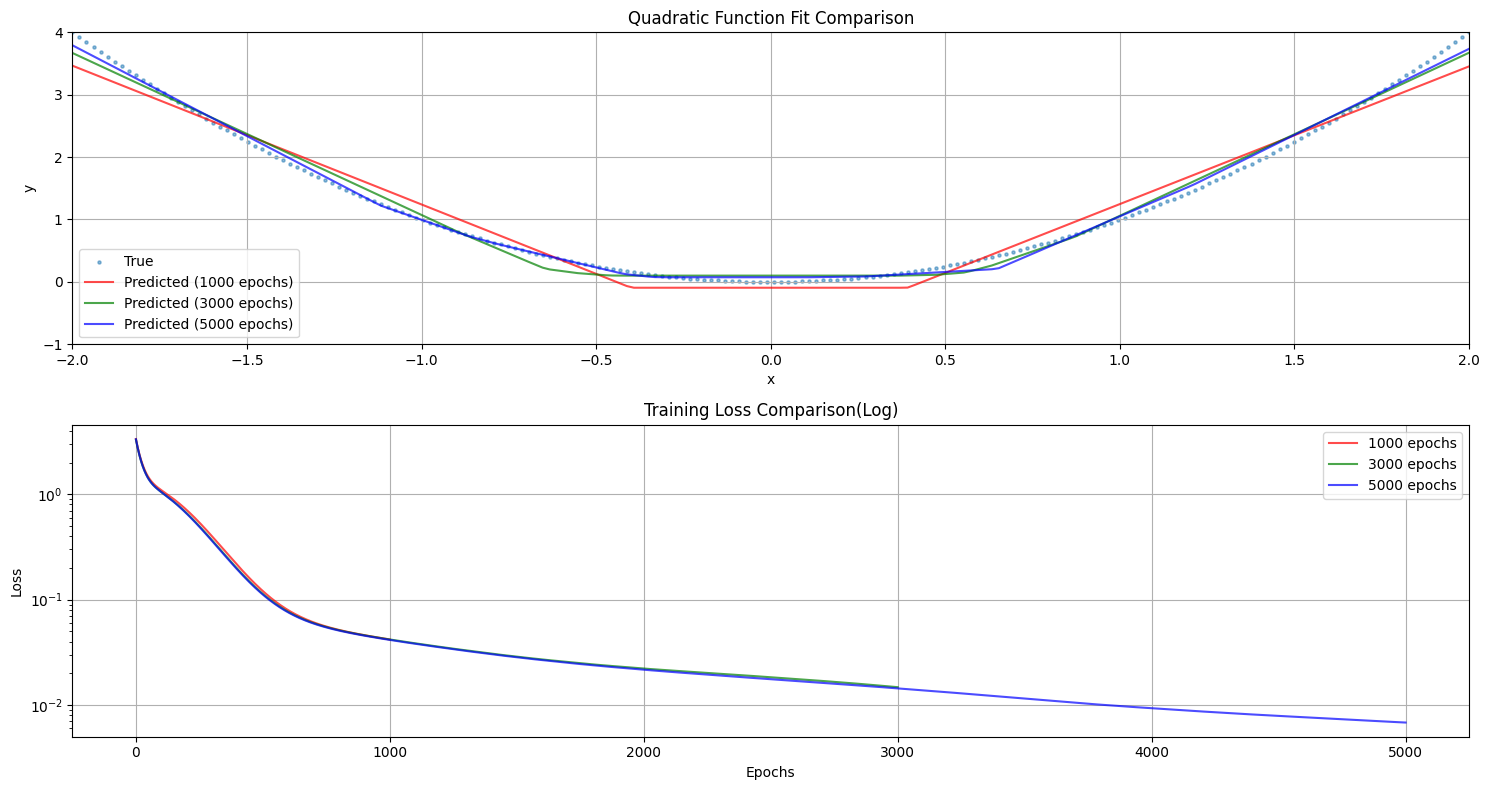

In [4]:
# 实验2：拟合二次函数
# 生成数据
x = np.linspace(-2, 2, 200)
y_true = x ** 2
x = x.reshape(-1, 1)
y_true = y_true.reshape(-1, 1)

# 定义不同的训练轮次
epochs_list = [1000, 3000, 5000]
all_parameters = []
all_losses = []

# 训练不同轮次的模型
for epochs in epochs_list:
    # 初始化参数
    parameters = initialize_parameters(
        input_size=1, 
        hidden_size=20,  # 使用20个神经元
        output_size=1
    )
    
    print(f"\n训练 {epochs} 轮次:")
    parameters_trained, losses = train_model(
        x, y_true, parameters,
        learning_rate=0.01,
        epochs=epochs
    )
    
    all_parameters.append(parameters_trained)
    all_losses.append(losses)

# 可视化不同轮次的结果
plt.figure(figsize=(15,8))

# 绘制拟合结果对比
plt.subplot(2,1,1)
plt.scatter(x, y_true, s=5, label='True', alpha=0.5)
colors = ['r', 'g', 'b']
for i, (epochs, params) in enumerate(zip(epochs_list, all_parameters)):
    _, y_pred = forward_pass(x, params)
    plt.plot(x, y_pred, color=colors[i], label=f'Predicted ({epochs} epochs)', alpha=0.7)
plt.title("Quadratic Function Fit Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-2, 2)  # 限制x轴范围
plt.ylim(-1, 4)   # 限制y轴范围
plt.legend()
plt.grid(True)

# 绘制loss曲线对比
plt.subplot(2,1,2)
for i, (epochs, losses) in enumerate(zip(epochs_list, all_losses)):
    plt.plot(range(1, len(losses)+1), losses, color=colors[i], label=f'{epochs} epochs', alpha=0.7)
plt.title("Training Loss Comparison(Log)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

## 实验3：拟合正弦函数 $ f(x) = \sin(x) $

### 理论设计
- **目标**：验证对周期函数的逼近能力
- **网络结构**：使用50个ReLU神经元，通过密集分段模拟正弦波震荡
- **训练技巧**：需降低学习率防止震荡，增加训练轮次保证收敛


训练 2000 轮次:
Epoch 100: Loss = 0.416752
Epoch 200: Loss = 0.404429
Epoch 300: Loss = 0.393192
Epoch 400: Loss = 0.382256
Epoch 500: Loss = 0.371366
Epoch 600: Loss = 0.360329
Epoch 700: Loss = 0.348999
Epoch 800: Loss = 0.337273
Epoch 900: Loss = 0.325105
Epoch 1000: Loss = 0.312519
Epoch 1100: Loss = 0.299574
Epoch 1200: Loss = 0.286377
Epoch 1300: Loss = 0.273072
Epoch 1400: Loss = 0.259817
Epoch 1500: Loss = 0.246796
Epoch 1600: Loss = 0.234198
Epoch 1700: Loss = 0.222199
Epoch 1800: Loss = 0.210959
Epoch 1900: Loss = 0.200606
Epoch 2000: Loss = 0.191225

训练 5000 轮次:
Epoch 100: Loss = 0.419072
Epoch 200: Loss = 0.409290
Epoch 300: Loss = 0.400302
Epoch 400: Loss = 0.391304
Epoch 500: Loss = 0.382084
Epoch 600: Loss = 0.372507
Epoch 700: Loss = 0.362483
Epoch 800: Loss = 0.351952
Epoch 900: Loss = 0.340881
Epoch 1000: Loss = 0.329261
Epoch 1100: Loss = 0.317118
Epoch 1200: Loss = 0.304513
Epoch 1300: Loss = 0.291540
Epoch 1400: Loss = 0.278334
Epoch 1500: Loss = 0.265061
Epoch 1600: 

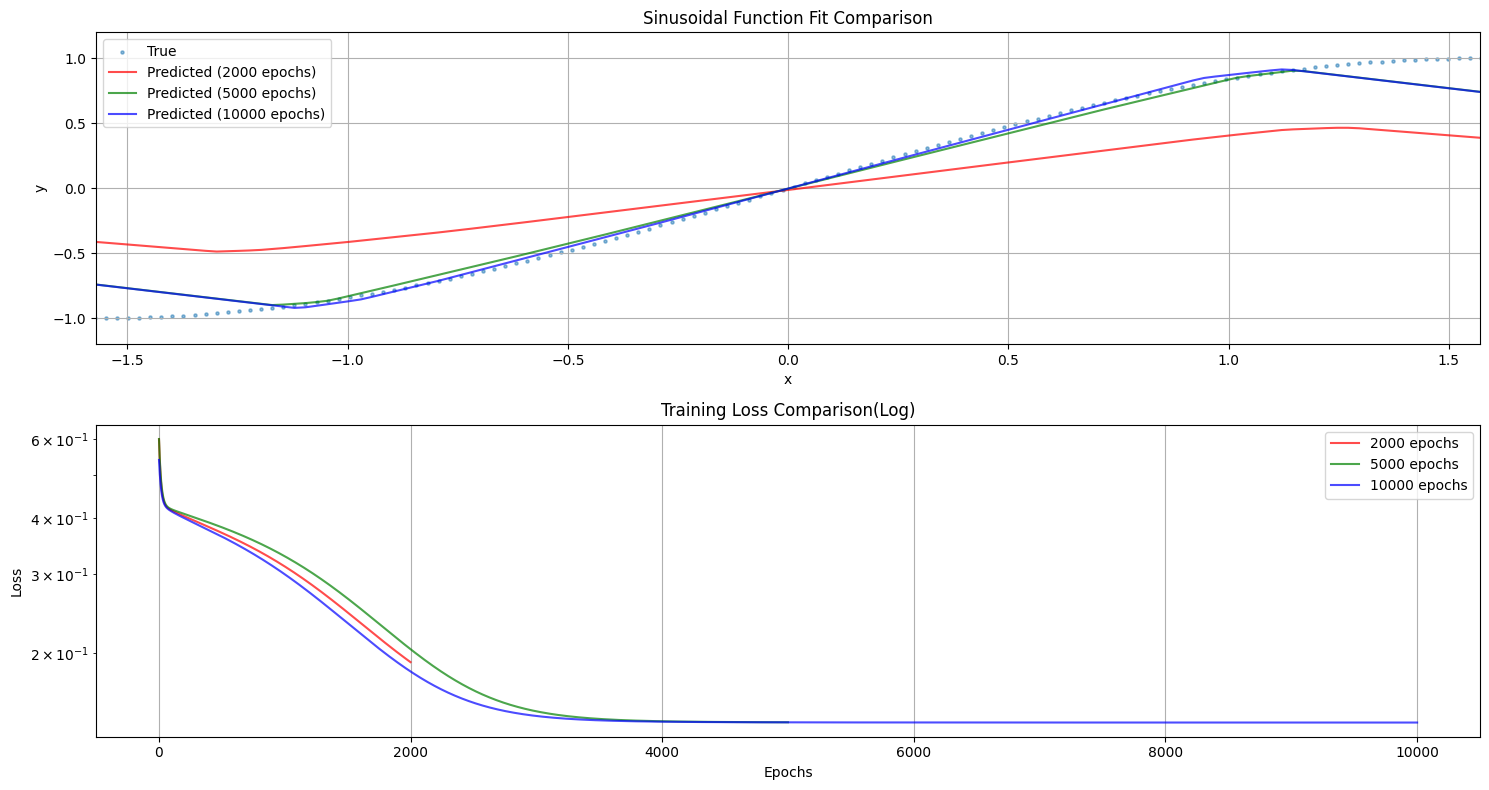

In [5]:
# 实验3：拟合正弦函数
# 生成数据
x = np.linspace(-2*np.pi, 2*np.pi, 500)
y_true = np.sin(x)
x = x.reshape(-1, 1)
y_true = y_true.reshape(-1, 1)

# 定义不同的训练轮次
epochs_list = [2000, 5000, 10000]
all_parameters = []
all_losses = []

# 训练不同轮次的模型
for epochs in epochs_list:
    # 初始化参数
    parameters = initialize_parameters(
        input_size=1, 
        hidden_size=50,  # 使用50个神经元
        output_size=1
    )
    
    print(f"\n训练 {epochs} 轮次:")
    parameters_trained, losses = train_model(
        x, y_true, parameters,
        learning_rate=0.005,  # 降低学习率防止震荡
        epochs=epochs
    )
    
    all_parameters.append(parameters_trained)
    all_losses.append(losses)

# 可视化不同轮次的结果
plt.figure(figsize=(15,8))

# 绘制拟合结果对比
plt.subplot(2,1,1)
plt.scatter(x, y_true, s=5, label='True', alpha=0.5)
colors = ['r', 'g', 'b']
for i, (epochs, params) in enumerate(zip(epochs_list, all_parameters)):
    _, y_pred = forward_pass(x, params)
    plt.plot(x, y_pred, color=colors[i], label=f'Predicted ({epochs} epochs)', alpha=0.7)
plt.title("Sinusoidal Function Fit Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.5*np.pi, 0.5*np.pi)  # 限制x轴范围
plt.ylim(-1.2, 1.2)          # 限制y轴范围,稍微留些余量
plt.legend()
plt.grid(True)

# 绘制loss曲线对比
plt.subplot(2,1,2)
for i, (epochs, losses) in enumerate(zip(epochs_list, all_losses)):
    plt.plot(range(1, len(losses)+1), losses, color=colors[i], label=f'{epochs} epochs', alpha=0.7)
plt.title("Training Loss Comparison(Log)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

## 实验4：拟合分段线性函数 $ f(x) = |x-1| + 0.5x $

### 理论设计
- **目标**：验证对显式分段结构的精确表示
- **网络结构**：4个ReLU神经元可精确表示，解析式分解为：

 $$ |x-1| = \text{ReLU}(x-1) + \text{ReLU}(1-x) $$

  剩余2个神经元用于表示 $ 0.5x $ 的正负部分。


训练 500 轮次:
Epoch 100: Loss = 0.987896
Epoch 200: Loss = 0.819302
Epoch 300: Loss = 0.697971
Epoch 400: Loss = 0.621740
Epoch 500: Loss = 0.579888

训练 1000 轮次:
Epoch 100: Loss = 1.011892
Epoch 200: Loss = 0.817314
Epoch 300: Loss = 0.694855
Epoch 400: Loss = 0.619856
Epoch 500: Loss = 0.578838
Epoch 600: Loss = 0.556356
Epoch 700: Loss = 0.543527
Epoch 800: Loss = 0.535917
Epoch 900: Loss = 0.531645
Epoch 1000: Loss = 0.528857

训练 2000 轮次:
Epoch 100: Loss = 0.322798
Epoch 200: Loss = 0.167172
Epoch 300: Loss = 0.095907
Epoch 400: Loss = 0.058443
Epoch 500: Loss = 0.036073
Epoch 600: Loss = 0.022014
Epoch 700: Loss = 0.013189
Epoch 800: Loss = 0.007709
Epoch 900: Loss = 0.004475
Epoch 1000: Loss = 0.002626
Epoch 1100: Loss = 0.001554
Epoch 1200: Loss = 0.000945
Epoch 1300: Loss = 0.000595
Epoch 1400: Loss = 0.000404
Epoch 1500: Loss = 0.000303
Epoch 1600: Loss = 0.000244
Epoch 1700: Loss = 0.000209
Epoch 1800: Loss = 0.000187
Epoch 1900: Loss = 0.000172
Epoch 2000: Loss = 0.000161


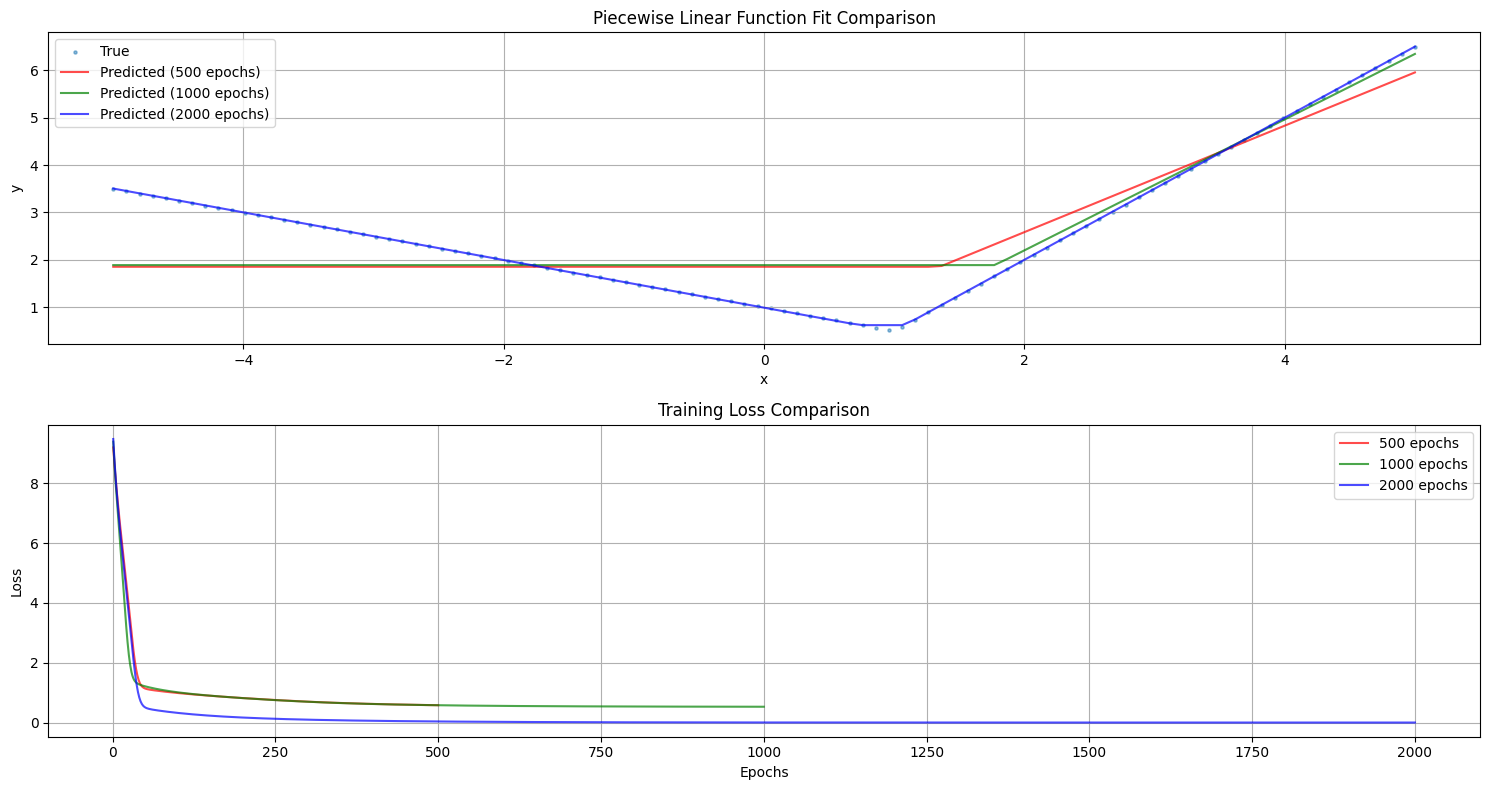

In [11]:
# 实验4：拟合分段线性函数
# 生成数据
x = np.linspace(-5, 5, 100)
y_true = np.abs(x - 1) + 0.5 * x
x = x.reshape(-1, 1)
y_true = y_true.reshape(-1, 1)

# 定义不同的训练轮次
epochs_list = [500, 1000, 2000]
all_parameters = []
all_losses = []

# 训练不同轮次的模型
for epochs in epochs_list:
    # 初始化参数
    parameters = initialize_parameters(
        input_size=1, 
        hidden_size=4,  # 理论上4个神经元足够
        output_size=1
    )
    
    print(f"\n训练 {epochs} 轮次:")
    parameters_trained, losses = train_model(
        x, y_true, parameters,
        learning_rate=0.01,
        epochs=epochs
    )
    
    all_parameters.append(parameters_trained)
    all_losses.append(losses)

# 可视化不同轮次的结果
plt.figure(figsize=(15,8))

# 绘制拟合结果对比
plt.subplot(2,1,1)
plt.scatter(x, y_true, s=5, label='True', alpha=0.5)
colors = ['r', 'g', 'b']
for i, (epochs, params) in enumerate(zip(epochs_list, all_parameters)):
    _, y_pred = forward_pass(x, params)
    plt.plot(x, y_pred, color=colors[i], label=f'Predicted ({epochs} epochs)', alpha=0.7)
plt.title("Piecewise Linear Function Fit Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# 绘制loss曲线对比
plt.subplot(2,1,2)
for i, (epochs, losses) in enumerate(zip(epochs_list, all_losses)):
    plt.plot(range(1, len(losses)+1), losses, color=colors[i], label=f'{epochs} epochs', alpha=0.7)
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 实验结果
1. 线性与分段线性函数：可通过解析设计网络结构实现零误差
2. 二次与正弦函数：依赖足够多的神经元和训练轮次实现高精度逼近